In [15]:
import pandas as pd

In [16]:
dca_df = pd.read_pickle('../data/dca_df.pkl')
dca_df.rename(columns={'variant target': 'target'}, inplace=True)
gene_var_df = dca_df[dca_df.target=='metJ']
dca_df

,DesignId,cvDesignEst,cvFit,cv,cvOutlier,baseMean,log2FoldChange,lfcSE,pvalue,padj,...,AA positions,AA ref seq,AA seq change,is_overlap,Grantham score,Grantham category,condition,positive_signif,positive_norm_score,min_max_norm_score
0,9835899,0.000100,0.122469,0.107650,False,142.699254,-0.147376,0.155337,0.324006,0.509286,...,{453},Y,C,True,194.0,radical,adipate,False,0.000000,0.414325
1,9835900,0.000100,0.095786,0.074417,False,457.645318,0.234263,0.102286,0.019719,0.055579,...,{453},Y,C,True,194.0,radical,adipate,False,0.050744,0.461243
2,9835901,0.000100,0.135688,0.116120,False,101.690949,0.064120,0.171874,0.696564,0.824925,...,{453},Y,C,True,194.0,radical,adipate,False,0.013889,0.440326
3,9835902,0.000100,0.090625,0.070824,False,720.246700,-0.192941,0.093270,0.035891,0.092580,...,{265},G,V,False,109.0,moderately radical,adipate,False,0.000000,0.408724
4,9835903,0.000100,0.092204,0.071572,False,614.453744,-0.107648,0.095533,0.252719,0.428408,...,{265},G,V,False,109.0,moderately radical,adipate,False,0.000000,0.419209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7632,9843549,0.000100,0.064872,0.056934,False,433.808882,0.067374,0.085190,0.409926,0.528135,...,{311},D,A,False,126.0,moderately radical,propanediol,False,0.029644,0.584655
7633,9843550,0.000100,0.036126,0.031386,False,2649.093156,0.126598,0.043220,0.003152,0.008225,...,{530},G,C,False,159.0,radical,propanediol,False,0.055701,0.595808
7634,9843551,0.000100,0.062743,0.055121,False,470.636998,0.330405,0.084307,0.000051,0.000192,...,{131},T,N,True,65.0,moderately conservative,propanediol,False,0.145373,0.634191
7635,9843552,0.123428,0.200628,0.190991,False,38.115093,-0.029193,0.224817,0.863137,0.905845,...,{110},,,False,,,propanediol,False,0.000000,0.566468


In [17]:
signif_gene_var_df = gene_var_df[gene_var_df.positive_signif].copy()

display(len(signif_gene_var_df), signif_gene_var_df.head())

28

,DesignId,cvDesignEst,cvFit,cv,cvOutlier,baseMean,log2FoldChange,lfcSE,pvalue,padj,...,AA positions,AA ref seq,AA seq change,is_overlap,Grantham score,Grantham category,condition,positive_signif,positive_norm_score,min_max_norm_score
77,9835976,0.053154,0.077247,0.072197,False,595.994933,1.208490,0.100800,3.040570e-34,5.185940e-32,...,{4},W,G,False,184.0,radical,butanediol,True,0.330677,0.616348
163,9836064,0.000100,0.084769,0.075801,False,405.480603,1.081911,0.110236,8.064010e-24,5.798180e-22,...,{6},G,D,False,94.0,moderately conservative,butanediol,True,0.296042,0.596495
208,9836109,0.090634,0.062053,0.070637,False,3239.011829,1.370969,0.086703,1.918730e-57,8.794970e-55,...,{50},R,H,False,29.0,conservative,butanediol,True,0.375136,0.641832
277,9836178,0.069743,0.074621,0.073521,False,704.258789,1.098953,0.099641,2.267700e-29,2.682470e-27,...,{6},G,C,False,159.0,radical,butanediol,True,0.300705,0.599168
2764,9838668,0.084456,0.087377,0.087387,False,362.760765,1.042516,0.123769,3.091190e-18,1.273640e-16,...,{3},E,Q,False,29.0,conservative,butanediol,True,0.285262,0.590317


In [18]:
# need to expand to 1 row per variant AA
df = pd.DataFrame()
for _, v in signif_gene_var_df.iterrows():
    for aa in v['AA positions']:
        df = pd.concat([
            df,
            pd.DataFrame.from_dict({
                'AA position': [aa],
                'log2FoldChange': [v['log2FoldChange']],
                'variant source': [v['variant source']],
            }, orient='columns')
        ])


import matplotlib

# use previous df to get df with each row a unique AA and count variants per AA.
out_df = pd.DataFrame()
for g, gdf in df.groupby(['AA position', 'variant source']):
    out_df = pd.concat([
        out_df,
        pd.DataFrame.from_dict({
            'AA position': [g[0]],
            'log2FoldChange': [gdf['log2FoldChange'].max()],
            'variant count': [len(gdf)],
            'variant source': [g[1]],
            'ngl sphere size': [len(gdf)],
        }, orient='columns')
    ])
out_df.reset_index(inplace=True, drop=True)  # necessary for JSON output

assert(out_df.log2FoldChange.min() > 0)  # not yet dealing with negative values.

norm = matplotlib.colors.Normalize(
    vmin=out_df.log2FoldChange.min(),
    vmax=out_df.log2FoldChange.max()
)

out_df['color'] = out_df.log2FoldChange.apply(lambda x: matplotlib.colors.rgb2hex(matplotlib.cm.YlOrRd(norm(x))))  # enrichment color
# out_df['source color'] = out_df['variant source'].apply(lambda x: {'Pangenome variant': '#FECB52', 'ALE variant': '#19D3F3'}[x])
out_df['residue pos'] = out_df['AA position']  # can do so since using AlphaFold structure that includes initiator methionine.
with open('vars.json', 'w') as outfile:  # for NGL
    outfile.write(out_df.to_json())

out_df

,AA position,log2FoldChange,variant count,variant source,ngl sphere size,color,residue pos
0,3,1.126066,2,WT alleleome,2,#fff8ba,3
1,4,1.208490,1,ICT ALE,1,#fff3af,4
2,6,1.098953,2,ICT ALE,2,#fff9be,6
3,13,1.826996,1,ALEdb,1,#febb56,13
4,15,2.062928,2,ALEdb,2,#fd9d43,15
5,19,2.049493,1,WT alleleome,1,#fd9f44,19
6,20,3.373424,2,WT alleleome,2,#800026,20
7,27,2.618210,2,ICT ALE,2,#f13624,27
8,35,1.238487,1,WT alleleome,1,#fff1a9,35
9,39,2.644410,4,WT alleleome,4,#ee3122,39


In [19]:
# need to expand to 1 row per variant AA
aa_var_df = pd.DataFrame()
for _, v in signif_gene_var_df.iterrows():
    aa_pos_l = sorted(list(v['AA positions']))
    # for aa in v['AA positions']:
    for i in range(len(aa_pos_l)):
        aa_pos = aa_pos_l[i]
        aa_var_df = pd.concat([
            aa_var_df,
            pd.DataFrame.from_dict({
                'DesignId': v['DesignId'],
                'AA position': [aa_pos_l[i]],  # expanding detail.
                'norm_score': v['positive_norm_score'],
                'condition': v['condition'],
                'variant source': v['variant source'],
                'AA ref seq': v['AA ref seq'][i] if len(v['AA ref seq']) > 0 else v['AA ref seq'],  # sometimes deletions
                'AA seq change': v['AA seq change'][i] if len(v['AA seq change']) > 0 else v['AA seq change'],  # sometimes deletions
                'EditType': v['EditType'],
            }, orient='columns')
        ])
display(len(aa_var_df), aa_var_df.head())

28

,DesignId,AA position,norm_score,condition,variant source,AA ref seq,AA seq change,EditType
0,9835976,4,0.330677,butanediol,ICT ALE,W,G,Substitution
0,9836064,6,0.296042,butanediol,ICT ALE,G,D,Substitution
0,9836109,50,0.375136,butanediol,ALEdb,R,H,Substitution
0,9836178,6,0.300705,butanediol,ICT ALE,G,C,Substitution
0,9838668,3,0.285262,butanediol,WT alleleome,E,Q,Substitution


In [20]:
aa_var_df.to_pickle('./aa_var_w_sv_df.pkl')

# Ignoring mutations to stop codon for now and INS variant.
aa_var_df = aa_var_df[aa_var_df['AA ref seq'] != '*']
aa_var_df.to_pickle('./aa_var_df.pkl')

In [21]:
# Don't need specific condition since this is implicitly included in DesignId.
uniq_var_df = aa_var_df[['DesignId', 'AA position',
# 'variant source'
]].drop_duplicates().copy()
display(uniq_var_df.head())

,DesignId,AA position
0,9835976,4
0,9836064,6
0,9836109,50
0,9836178,6
0,9838668,3


In [22]:
from biopandas.pdb import PandasPdb

pdf = PandasPdb().read_pdb('../data/structure_files/AF-P0A8U6-F1-model_v2.pdb')
adf = pdf.df['ATOM']
cadf = adf[adf["atom_name"]=="CA"]
cadf = cadf.set_index("residue_number")
cadf = cadf[cadf["alt_loc"].isin(['A', ''])]  # removing the 'B' residue alternative locations. I could also find the average between the two positions if necessary to account for both.
cadf.head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,insertion,blank_3,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
residue_number,,,,,,,,,,,,,,,,,,,,
1,ATOM,2,,CA,,MET,,A,,,-2.877,17.186,-9.677,1.0,62.18,,,C,NaN,55
2,ATOM,10,,CA,,ALA,,A,,,0.838,16.297,-9.731,1.0,72.17,,,C,NaN,63
3,ATOM,15,,CA,,GLU,,A,,,1.871,14.871,-13.128,1.0,85.23,,,C,NaN,68
4,ATOM,24,,CA,,TRP,,A,,,2.547,11.198,-12.356,1.0,93.91,,,C,NaN,77
5,ATOM,38,,CA,,SER,,A,,,5.795,9.790,-13.865,1.0,93.51,,,C,NaN,91


In [23]:
dist_res_df = cadf[['x_coord', 'y_coord', 'z_coord']].copy()
dist_res_df.head()

,x_coord,y_coord,z_coord
residue_number,,,
1,-2.877,17.186,-9.677
2,0.838,16.297,-9.731
3,1.871,14.871,-13.128
4,2.547,11.198,-12.356
5,5.795,9.790,-13.865


In [24]:
import numpy as np

def get_AA_dist(res1, res2):
    AA_dist = np.nan
    AA_dist = np.sqrt((dist_res_df.at[res2, "x_coord"] - dist_res_df.at[res1, "x_coord"])**2
                      + (dist_res_df.at[res2, "y_coord"] - dist_res_df.at[res1, "y_coord"])**2
                      + (dist_res_df.at[res2, "z_coord"] - dist_res_df.at[res1, "z_coord"])**2)
    return AA_dist

dist_mat = pd.DataFrame(np.nan, columns=dist_res_df.index, index=dist_res_df.index)
for ir in dist_mat.index:
    for ic in dist_mat.columns:
        dist_mat.at[ir, ic] = get_AA_dist(ir, ic)
dist_mat.head()

residue_number,1,2,3,4,5,6,7,8,9,10,...,96,97,98,99,100,101,102,103,104,105
residue_number,,,,,,,,,,,,,,,,,,,,,
1,0.000000,3.820270,6.309685,8.511931,12.142642,13.771097,15.675713,16.056076,17.253435,19.503885,...,17.064941,20.796140,20.374392,22.943915,21.832429,25.593073,26.330494,23.243992,24.538547,22.650320
2,3.820270,0.000000,3.826248,5.984238,9.165307,11.499108,12.934400,13.904413,15.067404,17.838639,...,15.211747,18.831741,18.226223,21.087664,20.238690,24.017315,24.242133,20.995994,22.081393,20.406080
3,6.309685,3.826248,0.000000,3.813645,6.462005,8.911583,11.069819,12.718994,14.751467,17.817072,...,11.602620,15.303937,15.121950,18.212095,17.883610,21.726515,21.890179,18.931185,20.515366,19.441143
4,8.511931,5.984238,3.813645,0.000000,3.848253,5.519859,7.486321,8.915877,11.164010,14.264641,...,9.921625,13.268956,12.296527,15.126498,14.450103,18.250500,18.379987,15.288021,16.804403,15.675590
5,12.142642,9.165307,6.462005,3.848253,0.000000,3.847926,5.261141,8.175844,10.805485,14.319728,...,7.878174,10.730231,9.659260,12.915437,12.950318,16.619013,16.085719,13.085865,14.666627,14.298409


In [25]:
uniq_var_df['residue position'] = uniq_var_df['AA position']  # since using AlphaFold structure, which includes starting Methionine.

In [26]:
# only want to keep variants in clustermap rows
dist_mat = dist_mat[dist_mat.index.isin(uniq_var_df['residue position'])]
dist_mat.head()

residue_number,1,2,3,4,5,6,7,8,9,10,...,96,97,98,99,100,101,102,103,104,105
residue_number,,,,,,,,,,,,,,,,,,,,,
3,6.309685,3.826248,0.000000,3.813645,6.462005,8.911583,11.069819,12.718994,14.751467,17.817072,...,11.602620,15.303937,15.121950,18.212095,17.883610,21.726515,21.890179,18.931185,20.515366,19.441143
4,8.511931,5.984238,3.813645,0.000000,3.848253,5.519859,7.486321,8.915877,11.164010,14.264641,...,9.921625,13.268956,12.296527,15.126498,14.450103,18.250500,18.379987,15.288021,16.804403,15.675590
6,13.771097,11.499108,8.911583,5.519859,3.847926,0.000000,3.846028,5.847010,9.354195,12.378027,...,6.569827,8.878232,7.016448,9.688037,9.264131,13.027470,12.979136,10.147639,12.293659,12.038260
13,25.874520,24.371111,24.831451,21.419313,21.430971,19.623506,16.958077,13.783223,10.628172,7.338492,...,25.422688,25.814246,22.066046,21.260226,18.021868,18.322718,18.232098,15.742661,13.168183,9.752113
15,31.321351,30.141917,30.405355,26.882860,26.853443,24.497964,22.133974,18.790623,16.272656,12.693983,...,29.682857,29.557526,25.797529,24.124306,20.740205,19.945195,20.334154,18.904544,16.518793,13.931522


In [27]:
feats_df = pd.read_pickle('./annot_df_metJ.pkl')
feats_df = feats_df[feats_df["feature"]!="Chain"]
feats_df.head()

,start,end,feature,color,range
0,10,11,dimer interface,#66C2A5,"(10, 2)"
1,13,13,dimer interface,#66C2A5,"(13, 1)"
2,20,31,dimer interface,#66C2A5,"(20, 12)"
3,33,34,dimer interface,#66C2A5,"(33, 2)"
4,36,37,dimer interface,#66C2A5,"(36, 2)"


In [28]:
# Expand features to have a row for each residue.
feat_per_res_df = pd.DataFrame()
for i, r in feats_df.iterrows():
    feat_per_res_df = pd.concat([feat_per_res_df, pd.DataFrame({'residue position': range(r['start'], r['end']+1), 'feature': r['feature'], 'color': r['color']})])
feat_per_res_df.drop_duplicates(inplace=True)
feat_per_res_df.set_index('residue position', inplace=True, drop=True)
display(len(feat_per_res_df), feat_per_res_df.head())

69

,feature,color
residue position,,
10,dimer interface,#66C2A5
11,dimer interface,#66C2A5
13,dimer interface,#66C2A5
20,dimer interface,#66C2A5
21,dimer interface,#66C2A5


In [29]:
feat_color_d_l = []
for g, gdf in feat_per_res_df.groupby('feature'):
    d = {}
    # display(g, gdf)  # debug
    for i in dist_mat.columns:
        if i in gdf.index:
            d[i] = gdf.at[i, 'color']
        else:
            d[i] = '#FFFFFF'
    feat_color_d_l.append(d)

# As many col_colors as there are unique features to plot.
col_colors = []
for i in range(0, len(feat_per_res_df.color.unique())):
    col_colors.append(dist_mat.columns.map(feat_color_d_l[i]))

# col_colors

In [30]:
feat_color_d = {}
df = feat_per_res_df.copy()
df.reset_index(drop=True, inplace=True)
df.drop_duplicates(inplace=True)
for _, r in df.iterrows():
    feat_color_d[r['feature']] = r['color']
feat_color_d

{'dimer interface': '#66C2A5',
 'DNA-binding site': '#8DA0CB',
 'Ca+2 binding site': '#E78AC3',
 'Mg+2 binding site': '#A6D854',
 'PO4 binding site': '#D5BB67',
 'SAM co-repressor binding site': '#FC8D62'}

In [32]:
def _get_var_annot(var):
    va = {"Substitution": "Sub", "Deletion": "Del", "Insertion": "Ins"}.get(var['EditType'], '')
    if (va == "Sub") & (len(var['AA seq change']) == 1):
            va = var['AA seq change']
    return va

aa_var_df['var annot'] = aa_var_df.apply(lambda v: _get_var_annot(v), axis=1)
aa_var_df.head()

,DesignId,AA position,norm_score,condition,variant source,AA ref seq,AA seq change,EditType,var annot
0,9835976,4,0.330677,butanediol,ICT ALE,W,G,Substitution,G
0,9836064,6,0.296042,butanediol,ICT ALE,G,D,Substitution,D
0,9836109,50,0.375136,butanediol,ALEdb,R,H,Substitution,H
0,9836178,6,0.300705,butanediol,ICT ALE,G,C,Substitution,C
0,9838668,3,0.285262,butanediol,WT alleleome,E,Q,Substitution,Q


In [33]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from util import const


# https://www.exeterlaboratory.com/genomics/in-silico-tools-used-for-the-interpretation-of-novel-variants/
def _get_grantham_category(grantham_score):
    gc = ''
    if grantham_score <= 50:
        gc = 'conservative'
    elif (grantham_score >= 51) & (grantham_score <= 100):
        gc = 'moderately conservative'
    elif (grantham_score >= 101) & (grantham_score <= 150):
        gc = 'moderately radical'
    else:
        gc = 'radical'
    return gc


aa_var_df['Grantham score'] = aa_var_df.apply(lambda r: const.GRANTHAM_SCORE_MAT[(r['AA ref seq'], r['AA seq change'])], axis=1)
aa_var_df['Grantham category'] = aa_var_df.apply(lambda r: _get_grantham_category(r['Grantham score']), axis=1)
aa_var_df.head()

,DesignId,AA position,norm_score,condition,variant source,AA ref seq,AA seq change,EditType,var annot,Grantham score,Grantham category
0,9835976,4,0.330677,butanediol,ICT ALE,W,G,Substitution,G,184,radical
0,9836064,6,0.296042,butanediol,ICT ALE,G,D,Substitution,D,94,moderately conservative
0,9836109,50,0.375136,butanediol,ALEdb,R,H,Substitution,H,29,conservative
0,9836178,6,0.300705,butanediol,ICT ALE,G,C,Substitution,C,159,radical
0,9838668,3,0.285262,butanediol,WT alleleome,E,Q,Substitution,Q,29,conservative


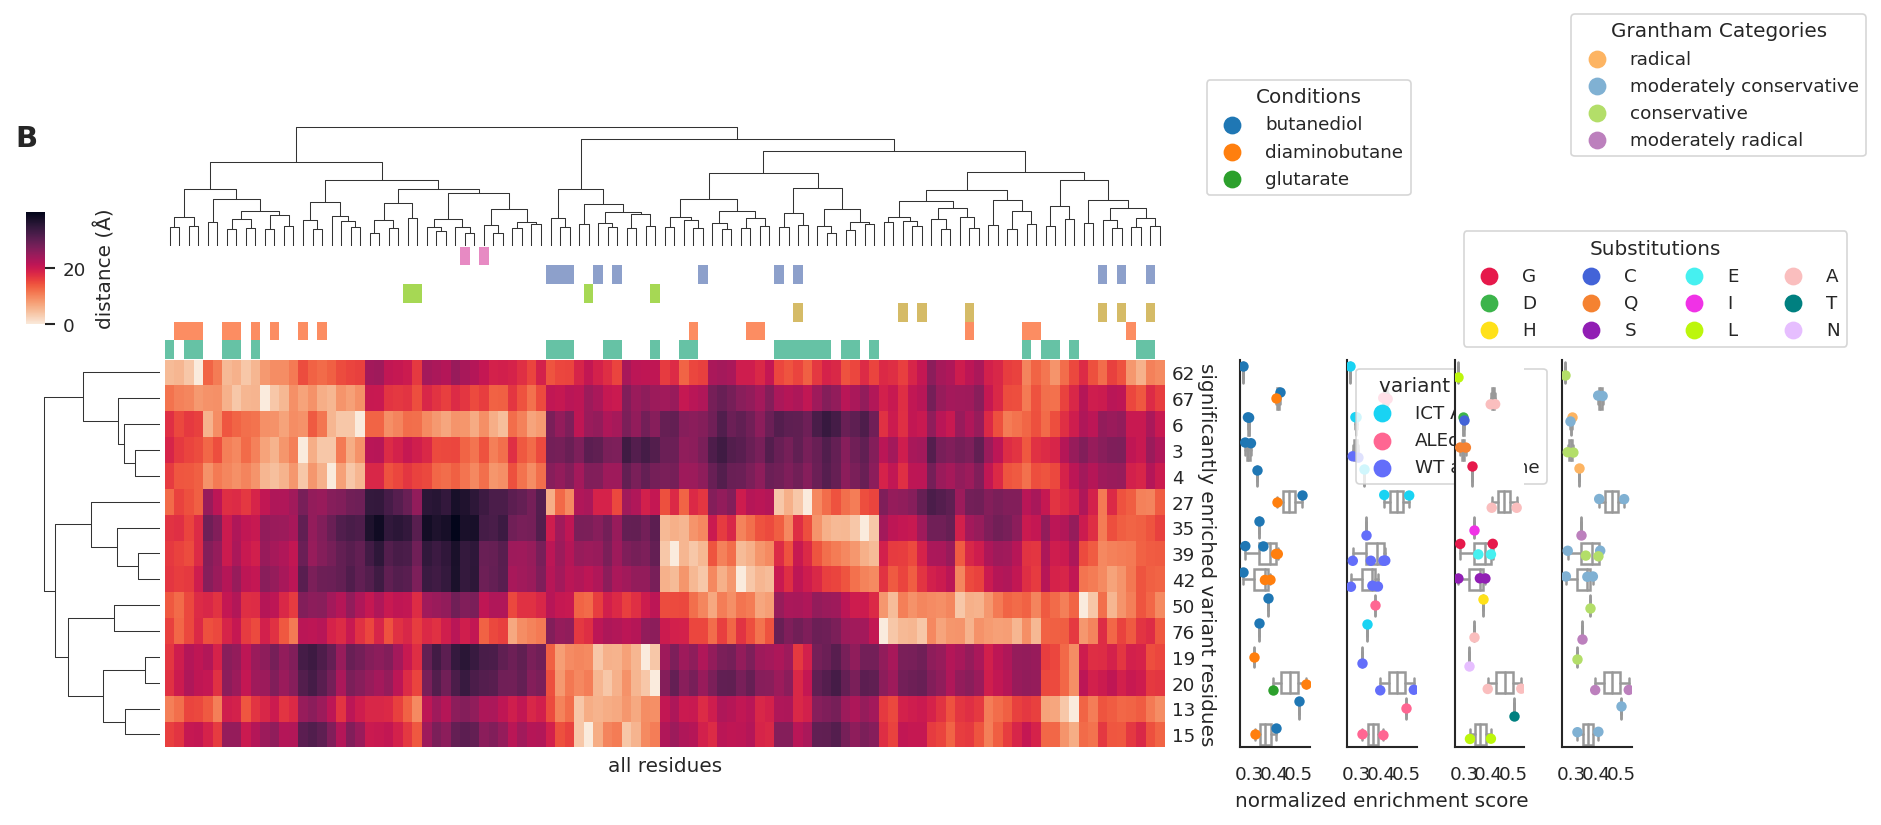

In [37]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from util import const


import seaborn as sns
import matplotlib
import matplotlib.pyplot as mpl

mpl.rcParams["figure.dpi"] = 150
sns.set_context("paper")
sns.set_style("white")

cm = sns.clustermap(
    dist_mat,
    cbar_kws={'label': 'distance (Å)'},
    cbar_pos=(0.13, 0.7, 0.01, 0.15),
    yticklabels=True,
    xticklabels=True,
    cmap="rocket_r",
    col_colors=col_colors,
    figsize=(13, 5),

)
mpl.setp(cm.ax_heatmap.get_yticklabels(), rotation=0)
cm.ax_heatmap.text(-0.15, 1.55, 'B', transform=cm.ax_heatmap.transAxes, weight='bold', fontsize=14)

# divide existing axes
from mpl_toolkits.axes_grid1 import make_axes_locatable

heatmap_space = make_axes_locatable(cm.ax_heatmap)
col_colors_space = make_axes_locatable(cm.ax_col_colors)
col_dendo_space = make_axes_locatable(cm.ax_col_dendrogram)
row_dendo_space = make_axes_locatable(cm.ax_row_dendrogram)

# create empty space of same size as bar plot axes (don't use this space)
col_dendo_space.new_horizontal(size="28%", pad=1.25)
col_colors_space.new_horizontal(size="28%", pad=1.25)

enrich_ax_cond = heatmap_space.append_axes("right", size="7%", pad=0.5)
enrich_ax_src = heatmap_space.append_axes("right", size="7%", pad=0.25)
enrich_ax_edit_type = heatmap_space.append_axes("right", size="7%", pad=0.25)
enrich_ax_grantham = heatmap_space.append_axes("right", size="7%", pad=0.25)

cm_y_tick_order = [t.get_text() for t in np.array(cm.ax_heatmap.get_yticklabels())]

df = aa_var_df.copy()
df['AA position'] = df['AA position'].astype(str)
sns.boxplot(ax=enrich_ax_cond, data=df, y="AA position", x="norm_score",
    fliersize=0, color='white', order=cm_y_tick_order)
sns.stripplot(
    ax=enrich_ax_cond,
    data=df,
    y="AA position",
    x="norm_score",
    hue="condition",
    order=cm_y_tick_order,
    dodge=True,
)
enrich_ax_cond.spines['top'].set_visible(False)
enrich_ax_cond.spines['right'].set_visible(False)
enrich_ax_cond.set_ylim(-0.5, len(dist_mat.index) - 0.5)  # needed to align bar-plots with clustermap residues
enrich_ax_cond.set_yticklabels([])
enrich_ax_cond.set_ylabel('')
enrich_ax_cond.invert_yaxis()
enrich_ax_cond.set_xlabel("")


sns.boxplot(ax=enrich_ax_src, data=df, y="AA position", x="norm_score",
    fliersize=0, color='white', order=cm_y_tick_order)
sns.stripplot(
    ax=enrich_ax_src,
    data=df,
    y="AA position",
    x="norm_score",
    hue="variant source",
    order=cm_y_tick_order,
    palette=const.VAR_SRC_COLOR_D,
    dodge=True,
)
enrich_ax_src.spines['top'].set_visible(False)
enrich_ax_src.spines['right'].set_visible(False)
enrich_ax_src.set_ylim(-0.5, len(dist_mat.index) - 0.5)  # needed to align bar-plots with clustermap residues
enrich_ax_src.set_yticklabels([])
enrich_ax_src.set_ylabel('')
enrich_ax_src.invert_yaxis()
enrich_ax_src.set_xlabel("normalized enrichment score")

sns.boxplot(ax=enrich_ax_edit_type, data=df, y="AA position", x="norm_score",
    fliersize=0, color='white', order=cm_y_tick_order)
sns.stripplot(
    ax=enrich_ax_edit_type,
    data=df,
    y="AA position",
    x="norm_score",
    hue="var annot",
    order=cm_y_tick_order,
    palette=['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080'],
    dodge=True,
)
enrich_ax_edit_type.spines['top'].set_visible(False)
enrich_ax_edit_type.spines['right'].set_visible(False)
enrich_ax_edit_type.set_ylim(-0.5, len(dist_mat.index) - 0.5)  # needed to align bar-plots with clustermap residues
enrich_ax_edit_type.set_yticklabels([])
enrich_ax_edit_type.set_ylabel('')
enrich_ax_edit_type.invert_yaxis()
enrich_ax_edit_type.set_xlabel("")

sns.boxplot(ax=enrich_ax_grantham, data=df, y="AA position", x="norm_score",
    fliersize=0, color='white', order=cm_y_tick_order)
sns.stripplot(
    ax=enrich_ax_grantham,
    data=df, y="AA position", x="norm_score", order=cm_y_tick_order, dodge=True,
    hue="Grantham category",
    palette=const.GRANTHAM_CATEGORY_COLOR_PALETTE,
)
enrich_ax_grantham.spines['top'].set_visible(False)
enrich_ax_grantham.spines['right'].set_visible(False)
enrich_ax_grantham.set_ylim(-0.5, len(dist_mat.index) - 0.5)  # needed to align bar-plots with clustermap residues
enrich_ax_grantham.set_yticklabels([])
enrich_ax_grantham.set_ylabel('')
enrich_ax_grantham.invert_yaxis()
enrich_ax_grantham.set_xlabel("")
enrich_ax_grantham.legend_.remove()

enrich_ax_cond.legend(bbox_to_anchor=(-0.6, 1.4), loc='lower left', title='Conditions')
enrich_ax_edit_type.legend(bbox_to_anchor=(0, 1.01), ncol=4, loc='lower left', title='Substitutions')
enrich_ax_grantham.legend(bbox_to_anchor=(0, 1.5), loc='lower left', title='Grantham Categories')

cm.ax_heatmap.xaxis.set_ticks([])
cm.ax_heatmap.set_ylabel('significantly enriched variant residues', rotation=270, labelpad=10)
cm.ax_heatmap.set_xlabel('all residues')
cm.ax_heatmap.tick_params(axis='both', which='both', length=0)

row_dendo = cm.ax_row_dendrogram.get_position()
cm.ax_row_dendrogram.set_position([
    row_dendo.x0 + 0.125, row_dendo.y0 + 0,
    row_dendo.width * 1 / 3, row_dendo.height,
])

# Saving to PDF, which keeps whitespace out from between cells in clustermap.
mpl.savefig("var_struct_cm_dca.pdf", format="pdf", bbox_inches="tight")